# Compute Data

In [1]:
include("DistrAlg.jl")

T       = Float64                    # data type
kap     = T(10)                      # condition ratio
B       = 1                          # default connectivity parameter
Bvals   = [ 1, 2, 3, 4 ]             # set of connectivity parameters
pts     = 50                         # number of points for plots
itermax = 10000                      # maximum number of iterations for plots
nvals   = [ 2, 10, 50 ]              # number of agents
λmin    = T(1)                       # minimum value of λ = (1+σ)/(1-σ)
λmax    = T(100)                     # maximum value of λ = (1+σ)/(1-σ)
λinit   = getλvals( λmin, λmax, 3 )  # initial values of λ to sample
;

#### Bound from DIGing paper using the stepsize that optimizes the bound from the DIGing paper

In [2]:
@time compute_DIGing_bound( kap, B, pts, 2*itermax, λinit, nvals )

  3.492493 seconds (12.45 M allocations: 630.202 MiB, 9.75% gc time)


#### Bound from LMI using the stepsize that optimizes the bound from the DIGing paper

In [3]:
@time compute_DIGing( kap, B, pts, 2*itermax, λinit )

 30.293954 seconds (93.85 M allocations: 4.934 GiB, 5.96% gc time)


#### Bound from LMI using the stepsize that optimizes the LMI

In [4]:
# 3 hours
@time compute_alphopt( ALGNAMES, kap, Bvals, pts, 2*itermax, λinit )

 EXTRA        κ = 10.0        B = 1        time =  157 sec
 EXTRA        κ = 10.0        B = 2        time =   63 sec
 EXTRA        κ = 10.0        B = 3        time =    0 sec
 EXTRA        κ = 10.0        B = 4        time =    0 sec
  NIDS        κ = 10.0        B = 1        time =   33 sec
  NIDS        κ = 10.0        B = 2        time =   68 sec
  NIDS        κ = 10.0        B = 3        time =    0 sec
  NIDS        κ = 10.0        B = 4        time =    0 sec
DIGing        κ = 10.0        B = 1        time =  123 sec
DIGing        κ = 10.0        B = 2        time =  373 sec
DIGing        κ = 10.0        B = 3        time =  737 sec
DIGing        κ = 10.0        B = 4        time = 1620 sec
AugDGM        κ = 10.0        B = 1        time =  119 sec
AugDGM        κ = 10.0        B = 2        time =  452 sec
AugDGM        κ = 10.0        B = 3        time = 1144 sec
AugDGM        κ = 10.0        B = 4        time = 1959 sec
ExDIFF        κ = 10.0        B = 1        time =  107 s

# Plot DIGing

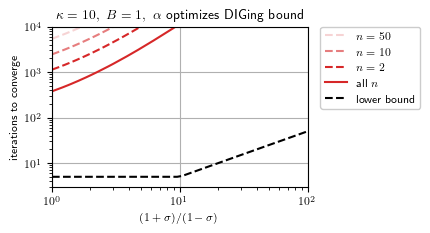

In [5]:
plot_DIGing( kap, B, pts, itermax, λmax, nvals )

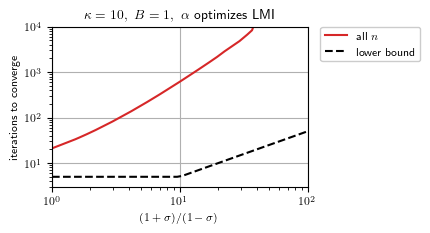

In [6]:
plot_DIGing( kap, B, pts, itermax, λmax )

# Plot Iterations to Converge

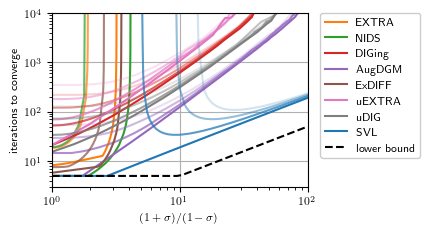

In [7]:
plot_iterations_all( ALGNAMES, kap, Bvals, pts, itermax, λmax )

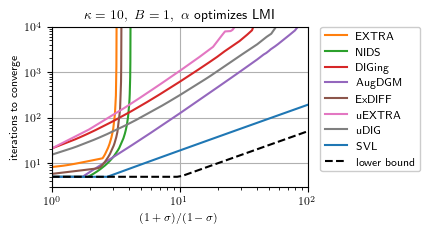

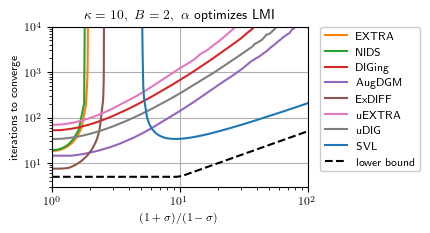

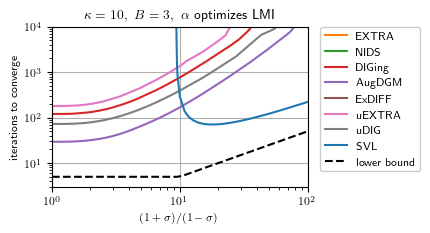

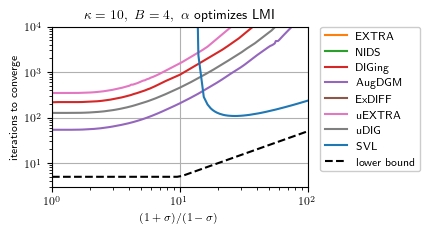

In [8]:
plot_iterations_for_fixed_B( ALGNAMES, kap, Bvals, pts, itermax, λmax )

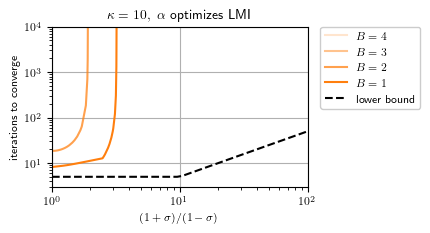

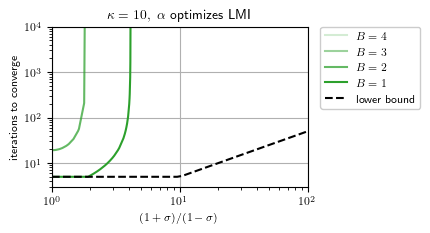

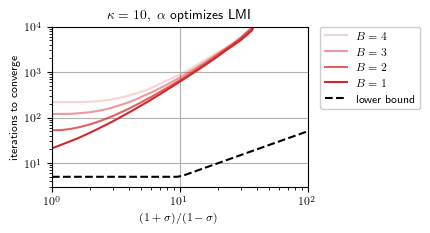

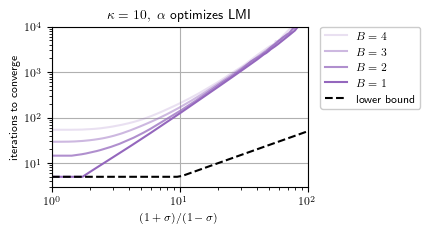

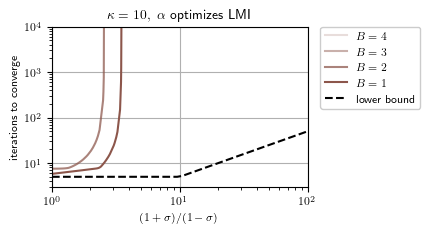

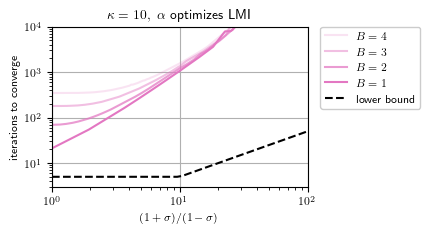

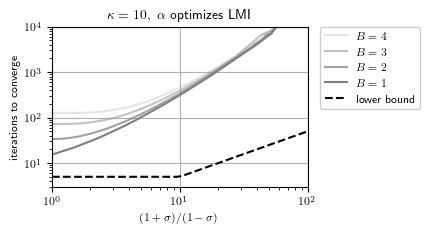

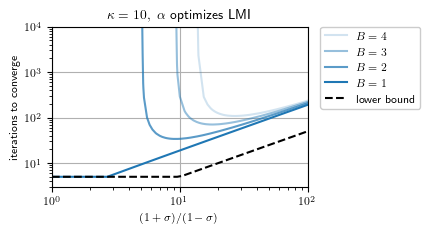

In [9]:
plot_iterations_for_fixed_alg( ALGNAMES, kap, Bvals, pts, itermax, λmax )

# Plot Optimal Stepsize

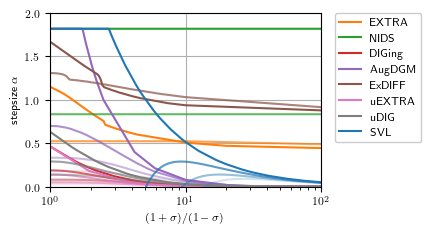

In [10]:
plot_stepsize_all( ALGNAMES, kap, Bvals, pts, itermax, λmax )

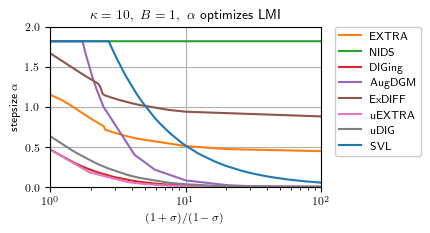

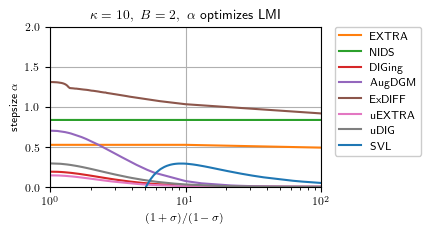

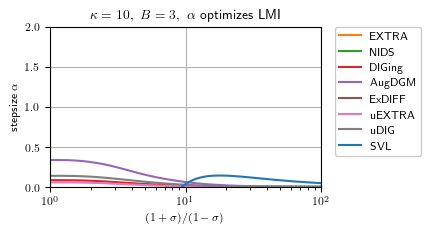

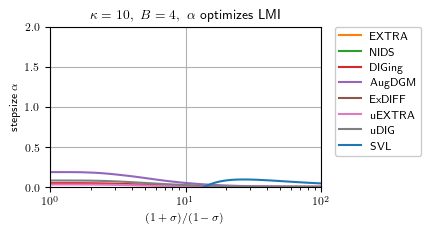

In [11]:
plot_stepsize_for_fixed_B( ALGNAMES, kap, Bvals, pts, itermax, λmax )

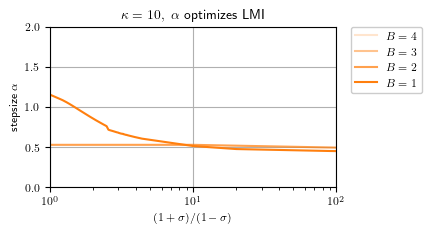

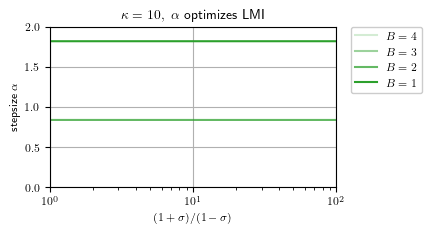

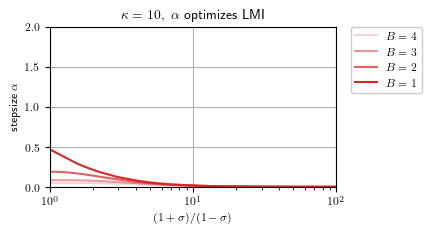

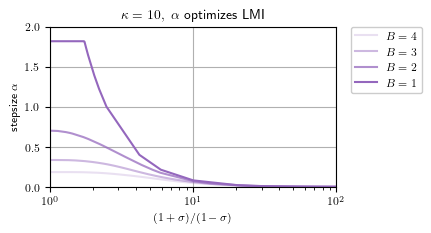

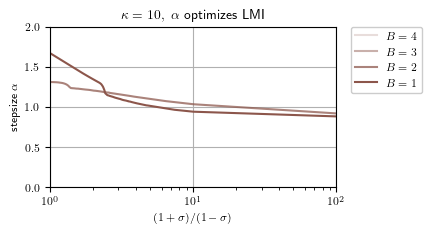

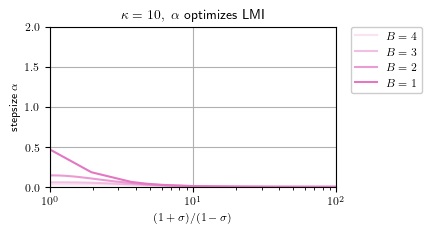

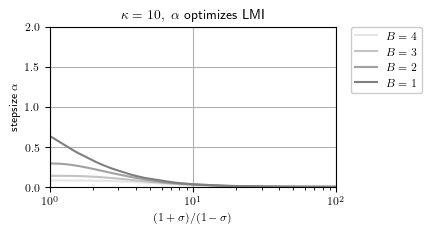

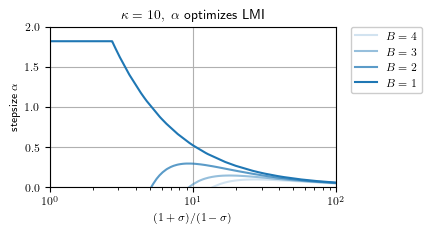

In [12]:
plot_stepsize_for_fixed_alg( ALGNAMES, kap, Bvals, pts, itermax, λmax )

# Adaptive Sampling

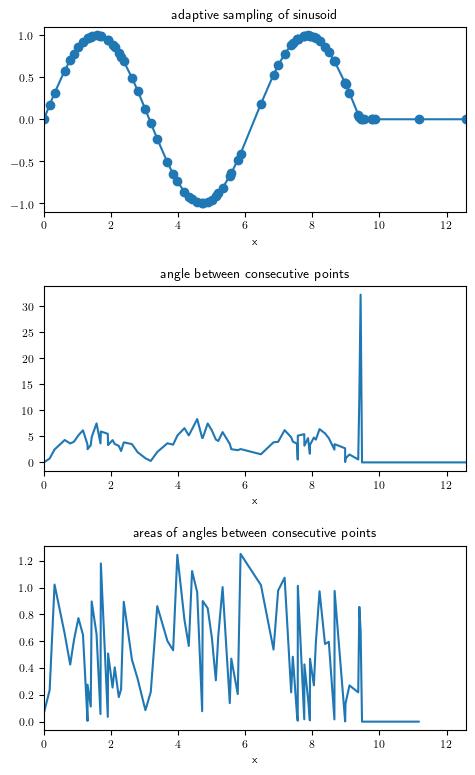

In [13]:
include("DistrAlg.jl")

f = (x,xvals,yvals,zvals) -> ( ( x < 3*π ? sin(x) : 0 ), nothing )
xinit = range( 0, 4*π, length=10 )

xvals, yvals = adaptive_sample( f, xinit, max_samples=80 )

angles = compute_angles( xvals, yvals )
areas  = compute_areas( xvals, angles )

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5,8))

ax1.plot(xvals,yvals,marker="o")
ax1.set_title("adaptive sampling of sinusoid")
ax1.set_xlabel("x")
ax1.set_xlim(xinit[1],xinit[end])

ax2.plot(xvals,angles)
ax2.set_title("angle between consecutive points")
ax2.set_xlabel("x")
ax2.set_xlim(xinit[1],xinit[end])

ax3.plot(xvals[1:end-1],areas)
ax3.set_title("areas of angles between consecutive points")
ax3.set_xlabel("x")
ax3.set_xlim(xinit[1],xinit[end])

tight_layout(pad=2)
;

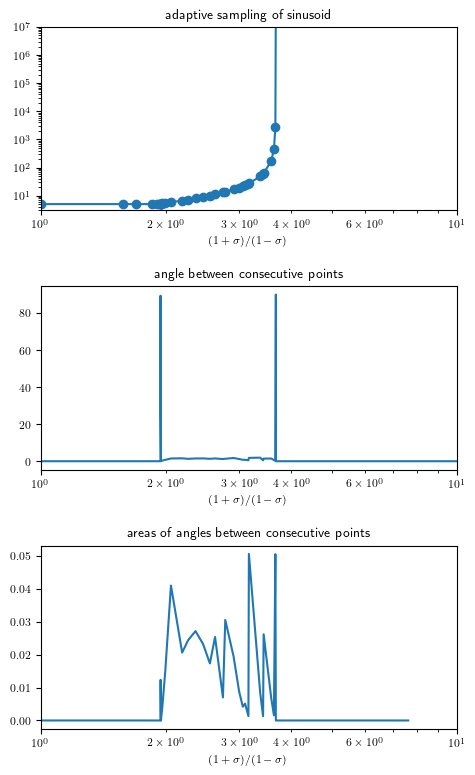

In [14]:
include("DistrAlg.jl")

# NIDS (approximate)
rho = sig -> ( 0 <= sig <= 0.32 ? 0.8182 : 0.7*sig+0.6 )

f = function (λ,λvals,yvals,zvals)
    sig  = (λ-1)/(λ+1)
    rh   = rho(sig)
    iter = ( rh < 1 ? -1/log(rh) : 1e8 )
    
    return iter, nothing
end

xinit = exp.( range( log(1), log(10), length=3 ) )

xvals,yvals = adaptive_sample( f, xinit, max_samples=50, xscale=log10, yscale=log10 )

angles = compute_angles( log10.(xvals), log10.(yvals) )
areas  = compute_areas(  log10.(xvals), angles )

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5,8))

ax1.plot(xvals,yvals,marker="o")
ax1.set_title( "adaptive sampling of sinusoid" )
ax1.set_xlabel( L"(1+\sigma)/(1-\sigma)" )
ax1.set_xlim(xinit[1],xinit[end])
ax1.axis( [ xinit[1], xinit[end], 3, 1e7 ] )
ax1.set_xscale("log")
ax1.set_yscale("log")

ax2.plot(xvals,angles)
ax2.set_title( "angle between consecutive points" )
ax2.set_xlabel( L"(1+\sigma)/(1-\sigma)" )
ax2.set_xlim( xinit[1], xinit[end] )
ax2.set_xscale("log")

ax3.plot(xvals[1:end-1],areas)
ax3.set_title( "areas of angles between consecutive points" )
ax3.set_xlabel( L"(1+\sigma)/(1-\sigma)" )
ax3.set_xlim( xinit[1], xinit[end] )
ax3.set_xscale("log")

tight_layout(pad=2)
;

# Figures from Paper

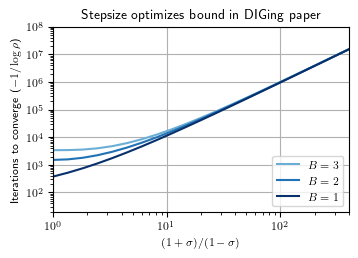

In [15]:
include("DistrAlg.jl")

plt.rc("text", usetex=true)

# make fonts smaller (default is 10)
plt.rc("font", size=8, family="sans-serif")

# figure
f, ax1 = plt.subplots(1, 1, sharey=true, figsize=(3.5,2.5))

# plot rate from LMI using the stepsize which optimizes the bound from the DIGing paper
@load "../data/DIGing.jld" algname kap sigvals Bvals alphas rhopts

# colors
cols = plt.get_cmap("Blues",length(Bvals)+2)

# iterations to converge
iter = convert(Array{Float64,2}, -1.0./log.(rhopts) )

# condition ratio of graph
lambda = convert(Array{Float64,1}, (1 .+ sigvals)./(1 .- sigvals) )

for (i,Bval) in Iterators.reverse(enumerate(Bvals))
    ax1.plot( lambda, iter[:,i], color=cols(length(Bvals)-i+2), label="\$B=$Bval\$" )
end

ax1.set_xlabel( L"$(1+\sigma)/(1-\sigma)$" )
ax1.set_ylabel( L"Iterations to converge ($-1/\log\rho$)" )
ax1.grid()
ax1.legend(loc="lower right")
ax1.axis( [ 1, 400, 20, 1e8 ] )
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_title( "Stepsize optimizes bound in DIGing paper" )

tight_layout(pad=0.5)
subplots_adjust(wspace=0.15)
savefig("../figures/DIGing1.pdf", pad_inches=0.0)
;

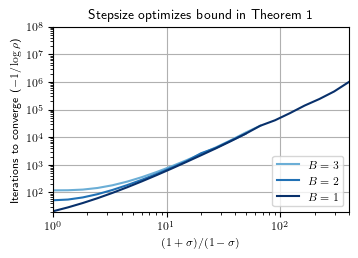

In [16]:
include("DistrAlg.jl")

plt.rc("text", usetex=true)

# make fonts smaller (default is 10)
plt.rc("font", size=8, family="sans-serif")

# figure
f, ax2 = plt.subplots(1, 1, sharey=true, figsize=(3.5,2.5))

@load "../data/DIGing_alphopt.jld" rhopts sigvals Bvals

# iterations to converge
iter = -1.0./log.(rhopts)

lambda = (1 .+ sigvals)./(1 .- sigvals)

iter[14:end,2] .= NaN
iter[15:end,3] .= NaN

iter[14,2] = iter[14,1]
iter[15,3] = iter[15,1]

for (i,Bval) in Iterators.reverse(enumerate(Bvals))
    ax2.plot( lambda, iter[:,i], color=cols(length(Bvals)-i+2), label="\$B=$Bval\$" )
end

ax2.set_xlabel( L"$(1+\sigma)/(1-\sigma)$" )
ax2.set_ylabel( L"Iterations to converge ($-1/\log\rho$)" )
ax2.grid()
ax2.legend(loc="lower right")
ax2.axis( [ 1, 400, 20, 1e8 ] )
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_title( "Stepsize optimizes bound in Theorem 1" )

tight_layout(pad=0.5)
subplots_adjust(wspace=0.15)
savefig("../figures/DIGing2.pdf", pad_inches=0.0)
;